<a href="https://colab.research.google.com/github/Pippi51/WSB-Dawid-Szwarc/blob/main/UczenieMaszynowe_Cwiczenia4_Zadania_202308.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Wczytujemy potrzebne biblioteki
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [ ]:
url = "https://raw.githubusercontent.com/palles77/MachineLearning_Exercise4/main/Employee_Compensation_SF.csv"
df = pd.read_csv(url)
X = df[['Total Salary', 'Retirement']]

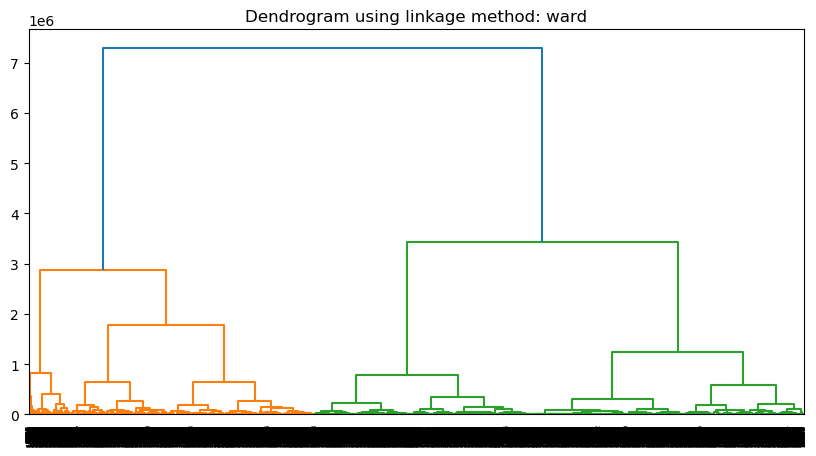

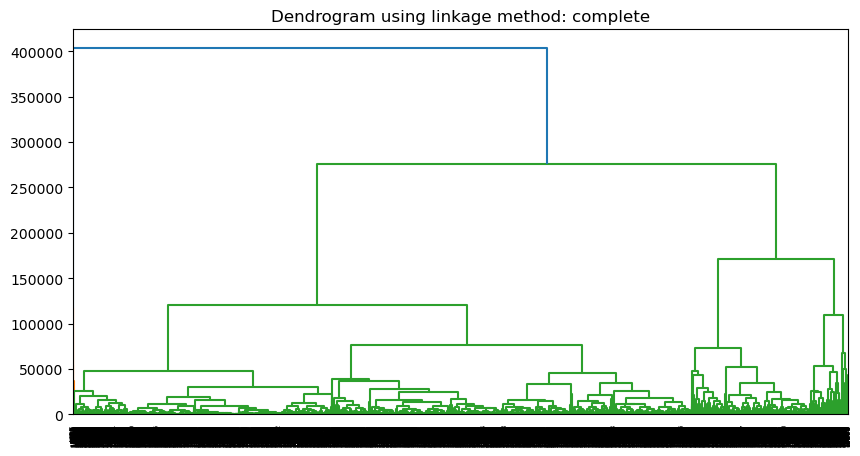

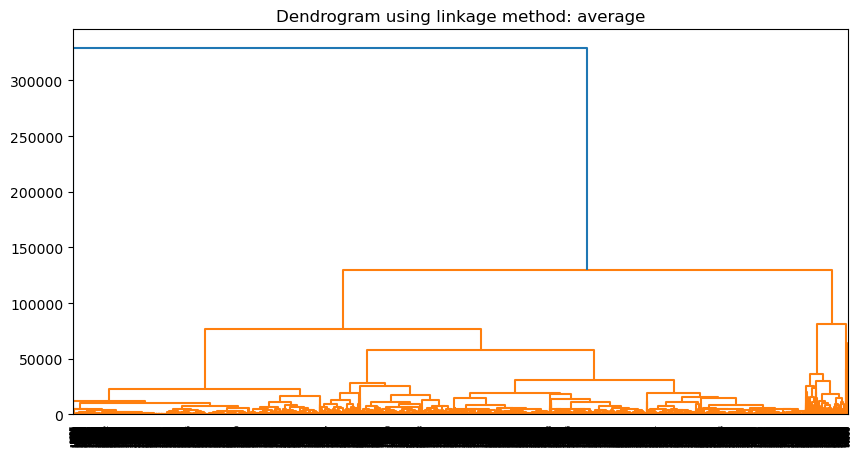

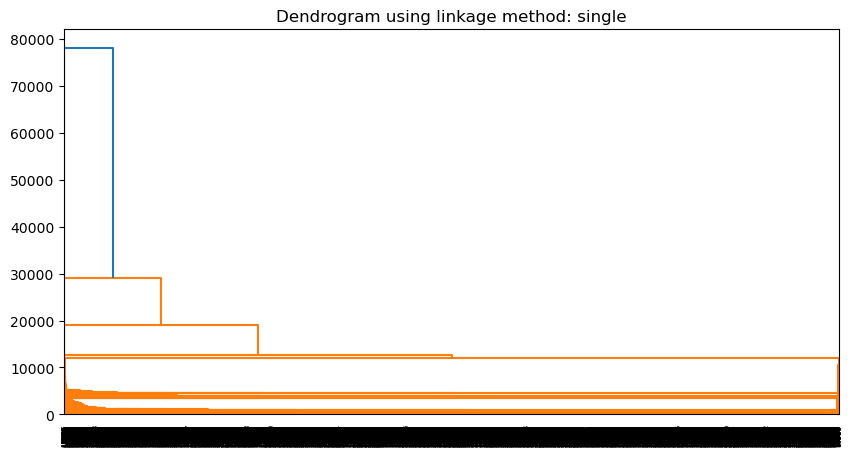

In [ ]:
X_sample = X.sample(frac=0.05, random_state=42)  # Pobieranie 5% próbki danych, dla przyspieszenia obliczeń

methods = ['ward', 'complete', 'average', 'single']

for method in methods:
    Z = linkage(X_sample, method=method)
    plt.figure(figsize=(10, 5))
    plt.title(f'Dendrogram using linkage method: {method}')
    dendrogram(Z)
    plt.show()

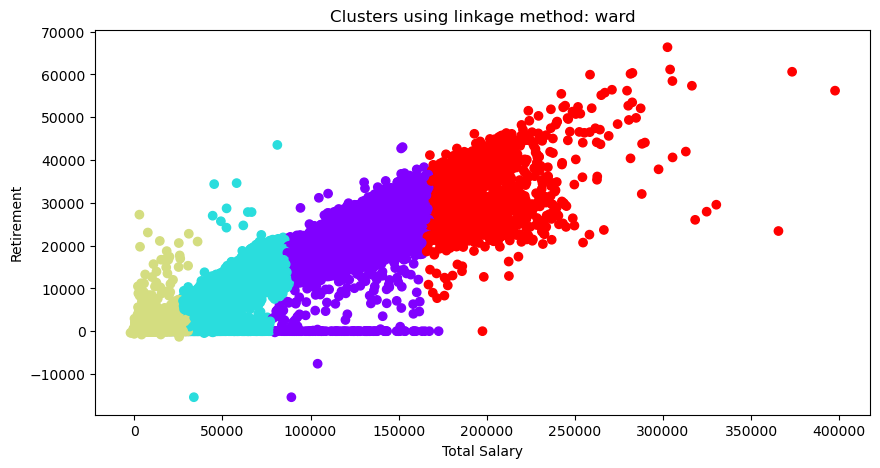

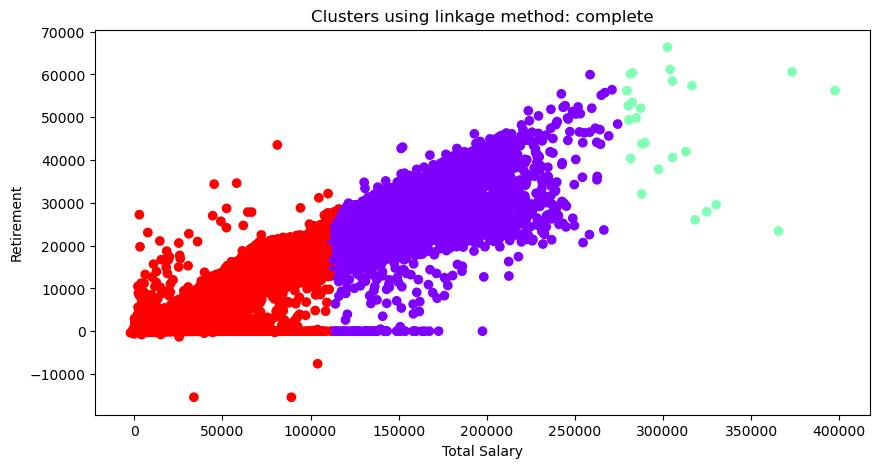

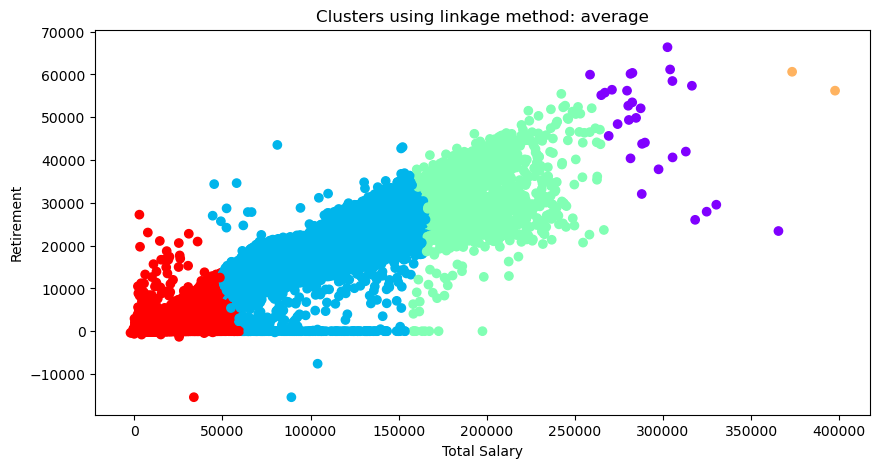

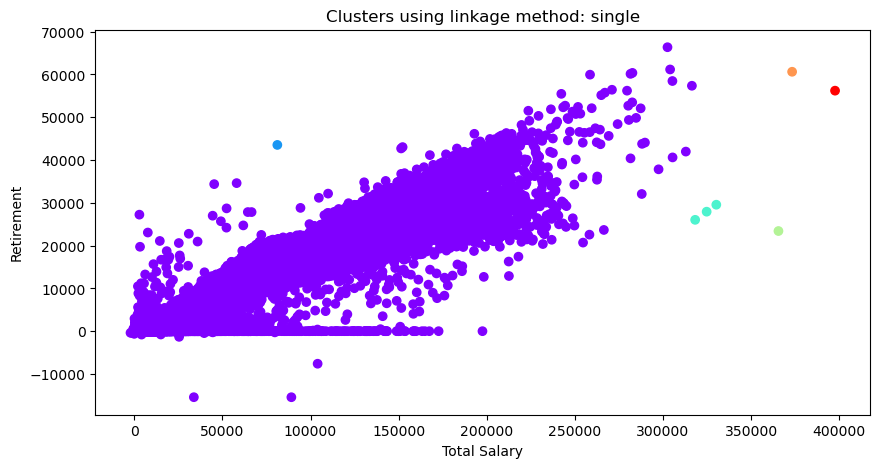

In [ ]:
# Próbka 10% danych, aby uniknąć błędów związanych z pamięcią
X_sample = X.sample(frac=0.1, random_state=42)

# Liczby klastrów wybrane wizualnie na podstawie dendrogramów dla różnych metod linkage
clusters_for_methods = {
    'ward': 4,
    'complete': 3,
    'average': 5,
    'single': 6
}

for method, n_clusters in clusters_for_methods.items():
    agglom = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    df_sample = X_sample.copy()  # Kopiowanie ramki danych próbki
    df_sample['cluster'] = agglom.fit_predict(X_sample)

    plt.figure(figsize=(10, 5))
    plt.scatter(df_sample['Total Salary'], df_sample['Retirement'], c=df_sample['cluster'], cmap='rainbow')
    plt.title(f'Clusters using linkage method: {method}')
    plt.xlabel('Total Salary')
    plt.ylabel('Retirement')
    plt.show()


Najlepszą metodą łączenia wydaje się być "ward", ze względu na największą jednorodność klastrów. Wynika to z faktu, że metoda polega na dążeniu do minimalizacji sumy kwadratów odległości, co w praktyce przekłada się na minimalizację wariancji klastrów.


Dla metody 'ward' nie jesteśmy w stanie sprawdzić różnych opcji 'affinities', dlatego skorzystamy z linkage = 'average'

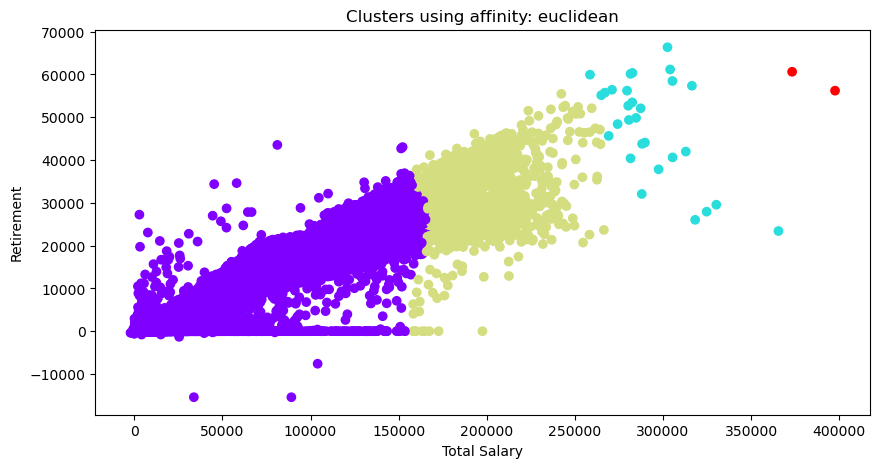

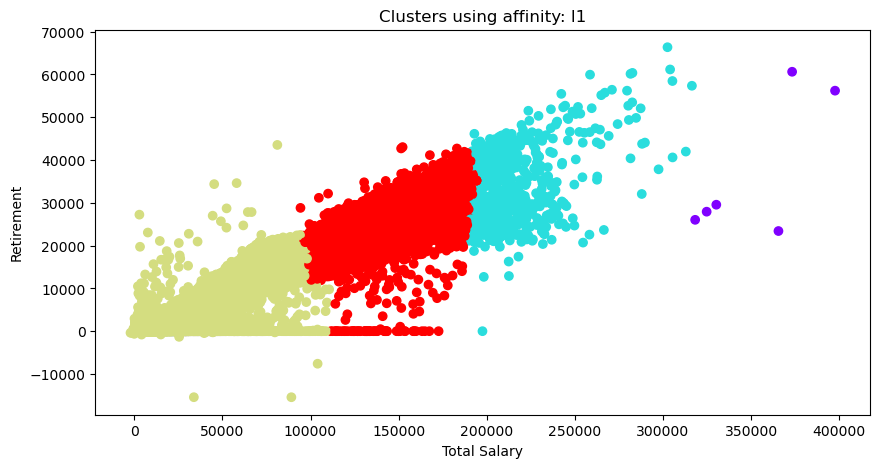

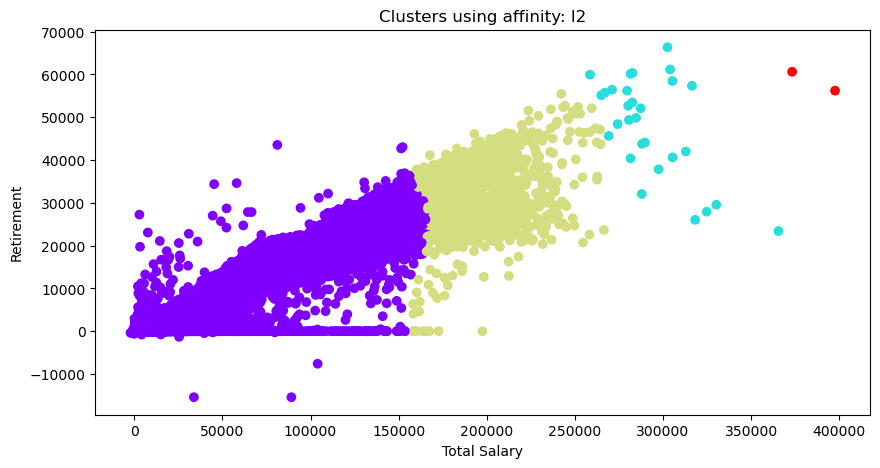

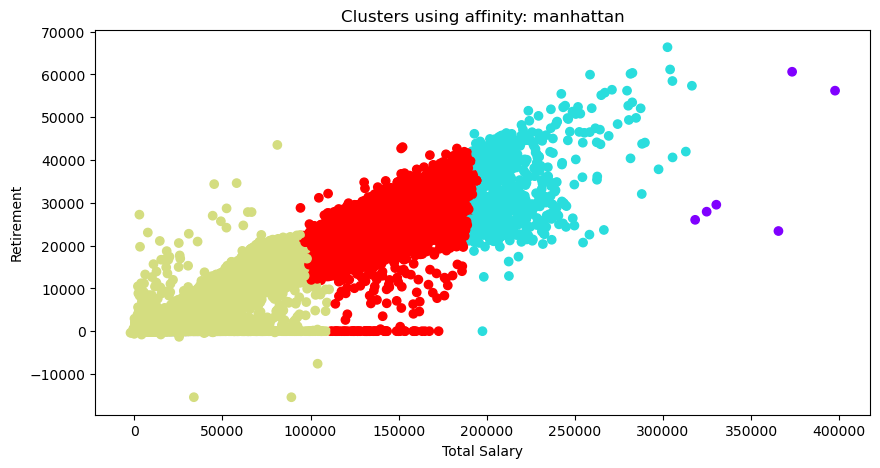

ValueError: Cosine affinity cannot be used when X contains zero vectors

In [ ]:
from sklearn.metrics import pairwise_distances

# Liczba klastrów na podstawie obserwacji dla metody 'ward'
n_clusters = 4  # Możesz dostosować tę wartość

affinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
for affinity in affinities:
    if affinity == "precomputed":
        # Obliczanie macierzy odległości dla próbki danych
        distance_matrix = pairwise_distances(X_sample)
        agglom = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage='average')
        df_sample['cluster'] = agglom.fit_predict(distance_matrix)
    else:
        agglom = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage='average')
        df_sample['cluster'] = agglom.fit_predict(X_sample)

    plt.figure(figsize=(10, 5))
    plt.scatter(df_sample['Total Salary'], df_sample['Retirement'], c=df_sample['cluster'], cmap='rainbow')
    plt.title(f'Clusters using affinity: {affinity}')
    plt.xlabel('Total Salary')
    plt.ylabel('Retirement')
    plt.show()


Zbiór danych nie pozwolił na sprawdzenie metody 'cosine' ze względu na obecność zerowych wektorów. Ciężko stwierdzić, która z metod jest najlepsza, gdyż jest to zależne od rozkładu klastrów. W przypadku równomiernych klastrów najsensowniejszym wyborem wydaje się być metoda 'eucldean'.